In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [4]:
# First we gather the BASIC INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Now Check the size of Rows & Columns

In [5]:
print(f'There are {df.shape[0]} Rows & {df.shape[1]} Columns')

There are 74 Rows & 20 Columns


Now let's see how many columns have null values in total.

In [6]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Now we have to analysis the data 
1. Which team won the most matches?

Text(0, 0.5, 'No. of winning Matches')

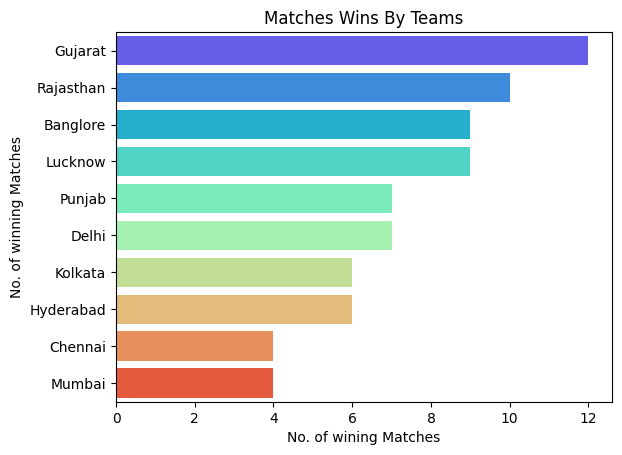

In [7]:
match_wins = df['match_winner'].value_counts()
sns.barplot(y = match_wins.index, x = match_wins.values, palette= 'rainbow')
plt.title('Matches Wins By Teams')
plt.xlabel('No. of wining Matches')
plt.ylabel('No. of winning Matches')

2. Toss Decision Trends.

Text(0.5, 1.0, 'toss_trends')

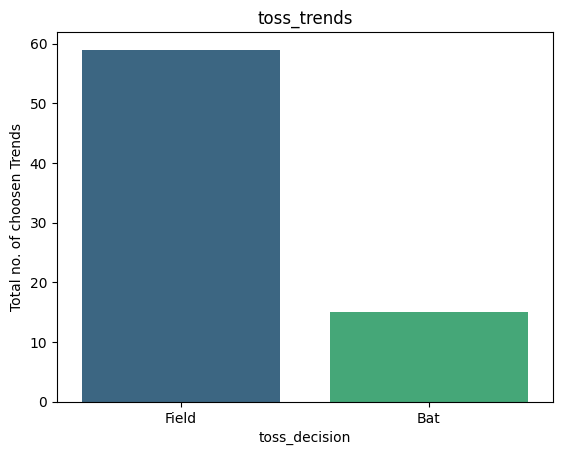

In [28]:
toss_trends = df['toss_decision'].value_counts()
sns.barplot(toss_trends, palette='viridis')
plt.ylabel('Total no. of choosen Trends')
plt.title('toss_trends')

3. Toss Winner vs Match Winner Predection

In [11]:
count = df[df['toss_winner'] == df['match_winner']] ['match_id'].count()
percentage = (count * 100)/df.shape[0]
print(f'Chances of winning of toss winner team: {percentage.round(2)}%')

Chances of winning of toss winner team: 48.65%


4. How do teams win?(Runs vs Wickets)

Text(0, 0.5, 'Win Counts')

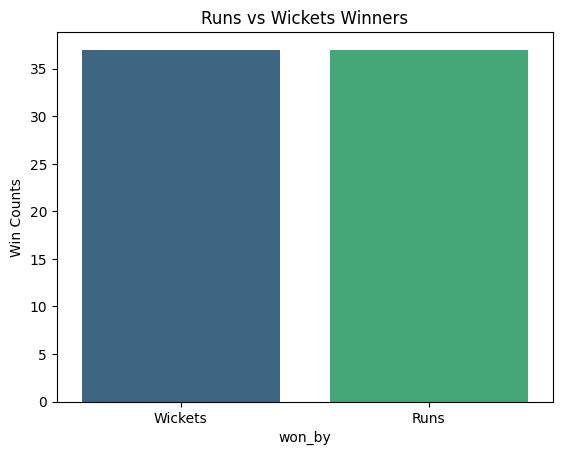

In [26]:
sns.countplot(x = df['won_by'], palette='viridis')
plt.title('Runs vs Wickets Winners')
plt.ylabel('Win Counts')

### Key Player Performances
1 Most "Player of the Match" Awards

Text(0, 0.5, 'Players of the Match')

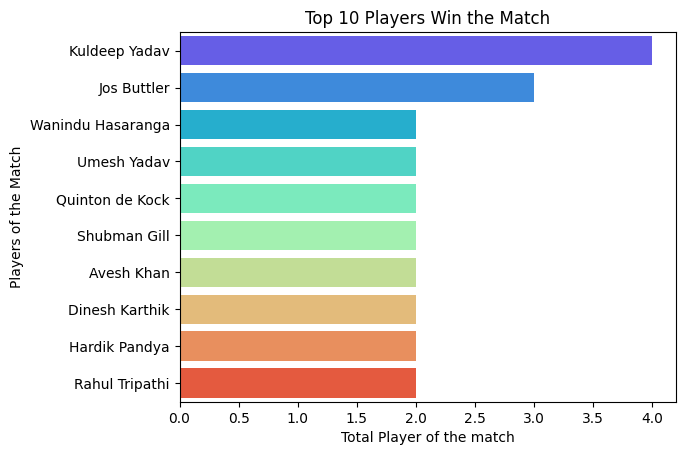

In [52]:
count = df['player_of_the_match'].value_counts().head(10)
count
sns.barplot(y = count.index, x = count.values, palette='rainbow')
plt.title('Top 10 Players Win the Match')
plt.xlabel('Total Player of the match')
plt.ylabel('Players of the Match')

2 Top Scorers 

Text(0.5, 0, 'Top Scorer Names')

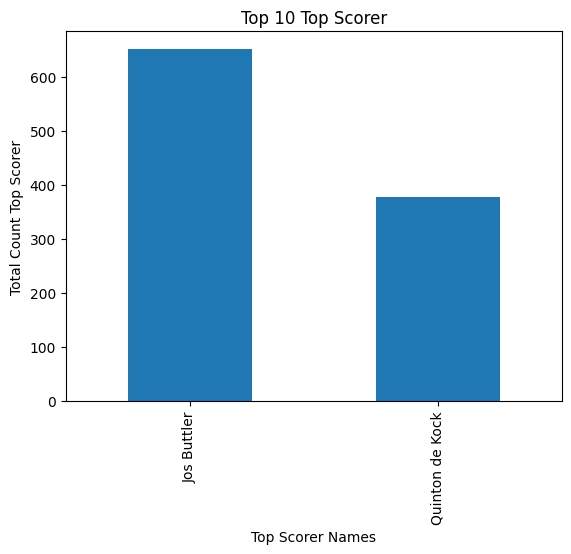

In [ ]:
high = df.groupby('top_scorer') ['highscore'].sum().sort_values(ascending= False).head(2)
high
high.plot(kind='bar')
plt.title(' Top Scorer')
plt.ylabel('Total Count Top Scorer')
plt.xlabel('Top Scorer Names')